# The error in Timescale.ut1()

When a user creates a `Time` by calling the `Timescale` method `ut1()`,
we use the UT1 date they supply to index into our ΔT table
even though that table is officially indexed by TT, not UT1.
How big a difference does that make?

In [1]:
%pylab inline
import numpy as np
from skyfield import api
from skyfield.constants import DAY_S

Populating the interactive namespace from numpy and matplotlib


In [2]:
ts = api.load.timescale()

In [3]:
century = 365 * 100
t = ts.tt(jd=np.arange(api.T0 - 10 * century, api.T0 + 10 * century))
print(t)
print(t[0].utc_jpl())
print(t[-1].utc_jpl())

<Time 730000 values from tt=2086545.000000 to tt=2816544.000000>
A.D. 1000-Aug-31 11:59:17.8160 UT
A.D. 2999-May-02 11:58:50.8160 UT


Over the 20 centuries centered on the present,
ΔT has a maximum value of more than 4,000 seconds but less than 5,000 seconds:

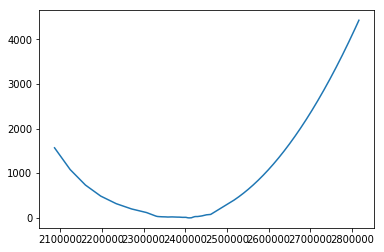

In [4]:
plot(t.tt, t.delta_t)

Using UT1 to index into ΔT generates an error in the value of ΔT
that is unacceptably high — around 1ms:

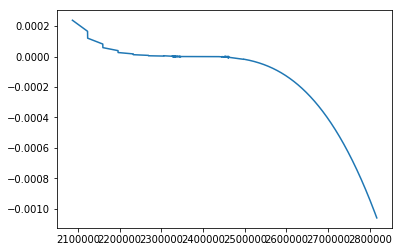

In [5]:
delta_t_approx1 = ts.tt(jd=t.ut1).delta_t
plot(t.tt, delta_t_approx1 - t.delta_t)

But we can drive the error far lower
by then using our initial ΔT estimate
to correct our value for TT
and then index a second time into the ΔT table.
This pushes the error down below 1e-9 seconds, which I'm happy with:

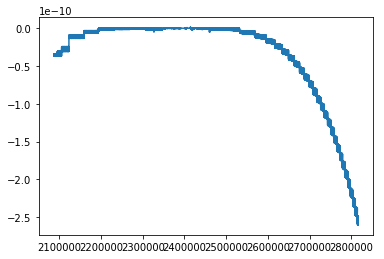

In [6]:
delta_t_approx2 = ts.tt(jd=t.ut1 + delta_t_approx1 / DAY_S).delta_t
plot(t.tt, delta_t_approx2 - t.delta_t)